NBA Shots 2014-2015 season

In [45]:
from pandas import Series, DataFrame
import pandas as pd
import datetime as dt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [46]:
df = pd.read_csv("shot_logs.csv")
len(df)
#df = pd.read_csv('/Users/arjunadapalli/NBA-Shots-2014-2015/shot_logs.csv', dtype=unicode)

128069

In [47]:
#if shot clock is null, that means there was less than 24 second left in the quarter. Do we want to convert the time left on the game clock to time on the shot clock?
#rename column w to win/lose
#split matchup into three columns, one for date, home team, away team
#
def home_team_split(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b1, b2) = b.split('@')
    if 'vs.' in b:
        (b2, b1) = b.split('vs.')

    b2 = b2.strip()

    return(b2)

def away_team_split(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b2, b1) = b.split('@')
    if 'vs.' in b:
        (b1, b2) = b.split('vs.')

    b2 = b2.strip()

    return(b2)

def data_split(x):
    (a,b)=x.split('-')
    a=a.strip()
    return a
def home_team_split(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b1, b2) = b.split('@')
    if 'vs.' in b:
        (b2, b1) = b.split('vs.')
    b2 = b2.strip()
    return(b2)

def away_team_split(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b2, b1) = b.split('@')
    if 'vs.' in b:
        (b1, b2) = b.split('vs.')
    b2 = b2.strip()
    return(b2)

def shooters_team(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b1, b2) = b.split('@')
    if 'vs.' in b:
        (b1, b2) = b.split('vs.')
    b1 = b1.strip()
    return(b1)

def defenders_team(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b1, b2) = b.split('@')
    if 'vs.' in b:
        (b1, b2) = b.split('vs.')
    b2 = b2.strip()
    return(b2)



In [48]:
df['date']=df['MATCHUP'].apply(data_split)
df['home_team']=df['MATCHUP'].apply(home_team_split)
df['away_team']=df['MATCHUP'].apply(away_team_split)
df['players_team']=df['MATCHUP'].apply(shooters_team)
df['defenders_team']=df['MATCHUP'].apply(defenders_team)

dfEdit = df.copy(deep=True)
#df[:10]

In [49]:
#del dfEdit['SHOT_RESULT']

In [50]:
#del dfEdit['MATCHUP']

In [51]:
#del dfEdit['LOCATION']

In [52]:
#del dfEdit['W']

In [53]:
df['GAME_CLOCK_TIME'] = pd.to_datetime(df['GAME_CLOCK'], format='%M:%S')
df['GAME_CLOCK_MINUTES']=df['GAME_CLOCK_TIME'].dt.minute
df['GAME_CLOCK_SECONDS']=df['GAME_CLOCK_TIME'].dt.second
df['GAME_CLOCK_TOT_SECONDS'] = 60 * df['GAME_CLOCK_MINUTES'] + df['GAME_CLOCK_SECONDS']

dfEdit['GAME_CLOCK_TOT_SECONDS'] = df['GAME_CLOCK_TOT_SECONDS']

In [54]:
#del dfEdit['GAME_CLOCK_TIME']

KeyError: 'GAME_CLOCK_TIME'

In [55]:
#del dfEdit['GAME_CLOCK']

In [56]:
#del dfEdit['GAME_CLOCK_MINUTES']

KeyError: 'GAME_CLOCK_MINUTES'

In [57]:
#del dfEdit['GAME_CLOCK_SECONDS']

KeyError: 'GAME_CLOCK_SECONDS'

# Stress 1: Shots in Last 2 min

In [58]:
#Do players generally have higher accuracies in "High-Stress" or "low-Stress" periods
mask1 = dfEdit['GAME_CLOCK_TOT_SECONDS']<=120
mask2 = dfEdit['PERIOD']>=4
dfStress1 = dfEdit[mask1 & mask2]
dfNonStress1 = dfEdit[-(mask1 & mask2)]

In [59]:
shotsMadeStress = dfStress1['FGM'] == 1
dfShotsMadeStress = dfStress1[shotsMadeStress]
shotAccuracyStress = float(len(dfShotsMadeStress)) / len(dfStress1)

shotsMadeNonStress = dfNonStress1['FGM'] == 1
dfShotsMadeNonStress = dfNonStress1[shotsMadeNonStress]
shotAccuracyNonStress = float(len(dfShotsMadeNonStress)) / len(dfNonStress1)

print shotAccuracyStress
print shotAccuracyNonStress

0.4295221843
0.453223576005


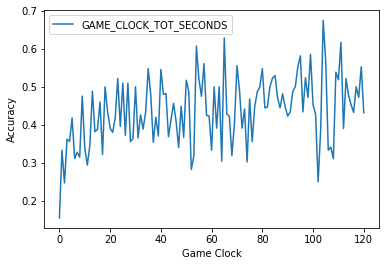

In [60]:
#Look at shot accuracy as a function of # of seconds left in PERIOD 4,5,6
mask1 = dfEdit['GAME_CLOCK_TOT_SECONDS']<=120
mask2 = dfEdit['PERIOD']>=4
dfLastFiveMin = dfEdit[mask1 & mask2]
listShotsTaken = dfLastFiveMin['GAME_CLOCK_TOT_SECONDS'].value_counts()
listShotsTaken.sort_index(ascending=True, inplace=True)

shotsMade = dfLastFiveMin['FGM'] == 1
listShotsMade = dfLastFiveMin[shotsMade]['GAME_CLOCK_TOT_SECONDS'].value_counts()
listShotsMade.sort_index(ascending=True, inplace=True)

shotAccuracy = listShotsMade / listShotsTaken

plot(shotAccuracy, marker='None', linestyle='-')
xlabel('Game Clock')
ylabel('Accuracy')
legend(loc='best')
show()

# Stress 2: Shots in last 5 seconds of shot clock

In [61]:
howManyNulls = dfEdit['SHOT_CLOCK'].isnull()
over24 = dfEdit['GAME_CLOCK_TOT_SECONDS'] >= 24
dfEdit = dfEdit[-(howManyNulls & over24)]
#dfReduceNA[dfReduceNA['SHOT_CLOCK'].isnull()]['GAME_CLOCK_TOT_SECONDS'].value_counts()

dfEdit['SHOT_CLOCK'].fillna(dfEdit.GAME_CLOCK_TOT_SECONDS, inplace=True)
#dfNoNA.isnull().any().any()

/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [62]:
mask5sec = dfEdit['SHOT_CLOCK']<=5
dfStress2 = dfEdit[mask5sec]
dfNonStress2 = dfEdit[-mask5sec]

shotsMadeStress2 = dfStress2['FGM'] == 1
dfShotsMadeStress2 = dfStress2[shotsMadeStress2]
shotAccuracyStress2 = float(len(dfShotsMadeStress2)) / len(dfStress2)

shotsMadeNonStress2 = dfNonStress2['FGM'] == 1
dfShotsMadeNonStress2 = dfNonStress2[shotsMadeNonStress2]
shotAccuracyNonStress2 = float(len(dfShotsMadeNonStress2)) / len(dfNonStress1)

print shotAccuracyStress2 #shot accuracy in stressful situations
print shotAccuracyNonStress2 #shot accuracy in non-stressful situations

0.357661583152
0.418160691929


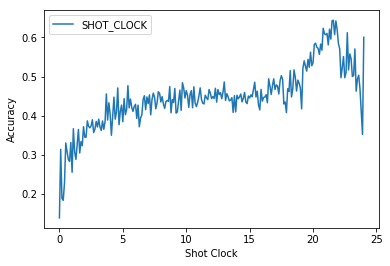

0.0      558
0.1       67
0.2       64
0.3       71
0.4       88
0.5       97
0.6      110
0.7      132
0.8      152
0.9      145
1.0     1173
1.1      161
1.2      179
1.3      191
1.4      193
1.5      203
1.6      194
1.7      213
1.8      223
1.9      218
2.0      995
2.1      238
2.2      251
2.3      228
2.4      236
2.5      257
2.6      244
2.7      258
2.8      282
2.9      270
        ... 
21.1     290
21.2     284
21.3     272
21.4     235
21.5     238
21.6     222
21.7     191
21.8     207
21.9     187
22.0     397
22.1     154
22.2     161
22.3     180
22.4     156
22.5     165
22.6     157
22.7     147
22.8     180
22.9     138
23.0     319
23.1     176
23.2     173
23.3     170
23.4     160
23.5     150
23.6     147
23.7     128
23.8     112
23.9      91
24.0    3857
Name: SHOT_CLOCK, Length: 241, dtype: int64

In [63]:
numShotsTaken = dfEdit['SHOT_CLOCK'].value_counts() 
numShotsTaken.sort_index(ascending=True, inplace=True)
numShotsTaken

shotMade = dfEdit['FGM'] == 1
dfShotMade = dfEdit[shotMade]
numShotsMade = dfShotMade['SHOT_CLOCK'].value_counts()
numShotsMade.sort_index(ascending=True, inplace=True)
numShotsMade

shotAccuracy = numShotsMade / numShotsTaken

plot(shotAccuracy, marker='None', linestyle='-')
xlabel('Shot Clock')
ylabel('Accuracy')
legend(loc='best')
show()

numShotsTaken

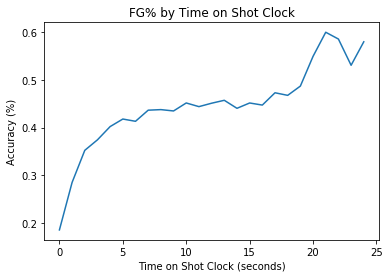

In [167]:
dfEdit['SHOT_CLOCK_Rounded'] = dfEdit['SHOT_CLOCK'].round(0).astype(int)

numShotsTaken = dfEdit['SHOT_CLOCK_Rounded'].value_counts() #Shots made under stress
numShotsTaken.sort_index(ascending=False, inplace=True)
numShotsTaken

shotMade = dfEdit['FGM'] == 1
dfShotMade = dfEdit[shotMade]
numShotsMade = dfShotMade['SHOT_CLOCK_Rounded'].value_counts()
numShotsMade.sort_index(ascending=False, inplace=True)
numShotsMade

shotAccuracy = numShotsMade / numShotsTaken
shotAccuracy.sort_index(ascending=False, inplace=True)

plot(shotAccuracy, marker='None', linestyle='-')
xlabel('Time on Shot Clock (seconds)')
ylabel('Accuracy (%)')
title('FG% by Time on Shot Clock')
show()


In [65]:
dfStress2.columns.values

array(['GAME_ID', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'SHOT_CLOCK',
       'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id', 'date', 'home_team',
       'away_team', 'players_team', 'defenders_team',
       'GAME_CLOCK_TOT_SECONDS'], dtype=object)

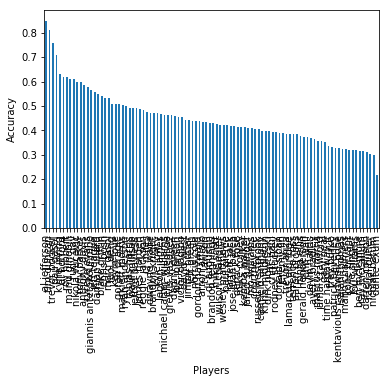

In [66]:
#Which players who have taken stressful shots more than 50 times have high accuracies?

distantShotsMask = dfStress2['SHOT_DIST'] > 8
distantShots = dfStress2[distantShotsMask]

numShotsByPlayer = distantShots['player_name'].value_counts()
stressShooterMask = numShotsByPlayer >= 50
stressShooters = numShotsByPlayer[stressShooterMask]

shotMade = dfStress2['FGM'] == 1
dfShotMade = dfStress2[shotMade]
numShotsMadeByPlayer = dfShotMade['player_name'].value_counts()

numShotsByPlayer.sort_index(inplace = True)
numShotsMadeByPlayer.sort_index(inplace=True)

stressShooterAccuracy = numShotsMadeByPlayer / stressShooters

stressShooterAccuracy.dropna(inplace=True)
stressShooterAccuracy.sort_index(inplace=True)
stressShooterAccuracy.sort_values(ascending=False,inplace=True)

stressShooterAccuracy.plot(kind='bar')
xlabel('Players')
ylabel('Accuracy')
# stressShooterMask = dfStress2['player_name'].value_counts() >= 50
# stressShooters = numShotsByPlayer[stressShooterMask]
# stressShooterList = stressShooters.index.values
# stressShooterList

# stressShooters

#These are players that have taken many stressful shots from further than 8 feet and their accuracy rates

# DEFENDER PROXIMITY

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


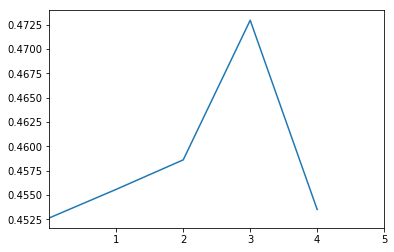

In [166]:
dfEdit['CLOSE_DEF_DIST_Round'] = dfEdit['CLOSE_DEF_DIST'].round(0).astype(int)
dfShotMade['CLOSE_DEF_DIST_Round'] = dfShotMade['CLOSE_DEF_DIST'].round(0).astype(int)

#dfEdit['CLOSE_DEF_DIST_Rounded'] = dfEdit['CLOSE_DEF_DIST'].round(0).astype(int)
defendDistListTaken = dfEdit['CLOSE_DEF_DIST_Round'].value_counts()
defendDistListTaken.sort_index(ascending=True, inplace=True)

#dfShotMade['CLOSE_DEF_DIST_Rounded'] = dfShotMade['CLOSE_DEF_DIST'].round(0).astype(int)
defendDistListMade = dfShotMade['CLOSE_DEF_DIST_Round'].value_counts()
defendDistListMade.sort_index(ascending=True, inplace=True)


shotAccuracyDefend = defendDistListMade/defendDistListTaken
lessThanFive = shotAccuracyDefend.index < 5
shotAccuracyDefendBelow5 = shotAccuracyDefend[lessThanFive]

# plot(shotAccuracyDefendBelow5, marker='None', linestyle='-')
# xlabel('Distance to the Nearest Defender (Feet)')
# ylabel('Accuracy (%)')
# title('FG% by Distance to the Nearest Defender')
# show()

# Series.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, 
#             legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, 
#             yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, 
#             table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
shotAccuracyDefendBelow5.plot(kind='line', xticks=[1,2,3,4,5])


# print defendDistListTaken
# print defendDistListMade
# print shotAccuracyDefend
# dfShotMade['FGM']

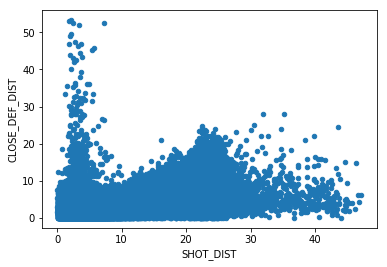

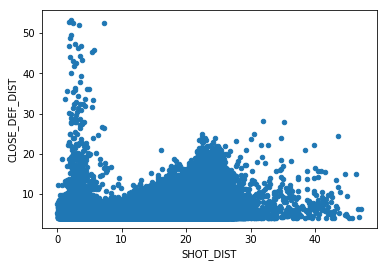

In [140]:
defDist4orMore = dfEdit['CLOSE_DEF_DIST'] >=4
dfdefDist4orMore = dfEdit[defDist4orMore]
dfdefDist4orMore.plot.scatter(x = 'SHOT_DIST',y = 'CLOSE_DEF_DIST')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


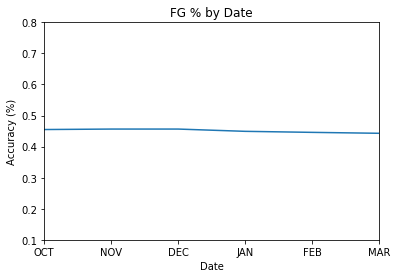

In [180]:
def data_split2(x):
    (a,b,c)=x.split(' ')
    a=a.strip()
    return a

dfEdit['month']=dfEdit['date'].apply(data_split2)
dfShotMade['month']=dfShotMade['date'].apply(data_split2)

dateListTaken = dfEdit['month'].value_counts()
dateListTakenOrdMonth = ['OCT','NOV','DEC','JAN', 'FEB','MAR']
dateListTakenOrdCount = [3532, 30152, 34215, 32316, 21486, 4351]
takenDateSeries = Series(dateListTakenOrdCount, index=dateListTakenOrdMonth)

#dateListTaken.sort_index(ascending=True, inplace=True)

# #dfShotMade['CLOSE_DEF_DIST_Rounded'] = dfShotMade['CLOSE_DEF_DIST'].round(0).astype(int)
dateListMade = dfShotMade['month'].value_counts()
dateListMadeOrdMonth = ['OCT','NOV','DEC','JAN', 'FEB','MAR']
dateListMadeOrdCount = [1607, 13764, 15619, 14516, 9580, 1927]
madeDateSeries = Series(dateListMadeOrdCount, index=dateListMadeOrdMonth)
#dateListMade.sort_index(ascending=True, inplace=True)
dateShotAccuracy = madeDateSeries/takenDateSeries

ax = dateShotAccuracy.plot(kind='line', x= "Month", y = "Accuracy (%)", ylim=(.1, .8), title = 'FG % by Date')
ax.set_xlabel("Date")
ax.set_ylabel("Accuracy (%)")

In [151]:
df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,player_id,date,home_team,away_team,players_team,defenders_team,GAME_CLOCK_TIME,GAME_CLOCK_MINUTES,GAME_CLOCK_SECONDS,GAME_CLOCK_TOT_SECONDS
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:01:09,1,9,69
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:00:14,0,14,14
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:00:00,0,0,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:11:47,11,47,707
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:10:34,10,34,634
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:08:15,8,15,495
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:10:15,10,15,615
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:08:00,8,0,480
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,203148,"MAR 04, 2015",BKN,CHA,CHA,BKN,1900-01-01 00:05:14,5,14,314
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,203148,"MAR 03, 2015",CHA,LAL,CHA,LAL,1900-01-01 00:11:32,11,32,692
